In [56]:
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [57]:
data1 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
data3 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data4 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data5 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data7 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
data8 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
data9 = pd.read_csv('C:/Users/daini/OneDrive/Dators/ai/MachineLearningCSV/MachineLearningCVE/CICIDS2017_sample_km.csv')

In [58]:
data_list = [data8]
data_combined = pd.concat(data_list)

# Izvada datu dimensijas
rows, cols = data_combined.shape
print('New dimension:')
print(f'Number of rows: {rows}, Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

# Deleting dataframes after concating to save memory
for d in data_list: del d

# Noņem liekās atstarpes no kolonnu nosaukumiem
col_names = {col: col.strip() for col in data_combined.columns}
data_combined.rename(columns = col_names, inplace = True)

data_combined.columns

New dimension:
Number of rows: 692703, Number of columns: 79
Total cells: 54723537


Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [59]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             692703 non-null  int64  
 1   Flow Duration                692703 non-null  int64  
 2   Total Fwd Packets            692703 non-null  int64  
 3   Total Backward Packets       692703 non-null  int64  
 4   Total Length of Fwd Packets  692703 non-null  int64  
 5   Total Length of Bwd Packets  692703 non-null  int64  
 6   Fwd Packet Length Max        692703 non-null  int64  
 7   Fwd Packet Length Min        692703 non-null  int64  
 8   Fwd Packet Length Mean       692703 non-null  float64
 9   Fwd Packet Length Std        692703 non-null  float64
 10  Bwd Packet Length Max        692703 non-null  int64  
 11  Bwd Packet Length Min        692703 non-null  int64  
 12  Bwd Packet Length Mean       692703 non-null  float64
 13 

In [60]:
# Daru tīrīšana
# Dublētu vērtību identificēšana
dups = data_combined[data_combined.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 81909


In [61]:
# Noņemam visus dubultos ierakstus
data_combined.drop_duplicates(inplace = True)
data_combined.shape

(610794, 79)

In [62]:
# Trūkstošo vērtību noteikšana
missing_val = data_combined.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    61
dtype: int64


In [63]:
# Bezgalības vērtību pārbaude
numeric_cols = data_combined.select_dtypes(include = np.number).columns
inf_count = np.isinf(data_combined[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      241
Flow Packets/s    302
dtype: int64


In [64]:
# Jebkuru bezgalīgu vērtību (pozitīvu vai negatīvu) aizstāšana ar NaN (nevis skaitli)
print(f'Initial missing values: {data_combined.isna().sum().sum()}')

data_combined.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data_combined.isna().sum().sum()}')

Initial missing values: 61
Missing values after processing infinite values: 604


In [65]:
# Identificējam un saskaitītām trūkstošās vērtības
missing = data_combined.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      302
Flow Packets/s    302
dtype: int64


In [66]:
# Trūkstošo vērtību procentuālās daļas aprēķināšana
mis_per = (missing / len(data_combined)) * 100
print(mis_per[mis_per > 0].round(2))

Flow Bytes/s      0.05
Flow Packets/s    0.05
dtype: float64


In [67]:
# Mediānas noteikšana
med_flow_bytes = data_combined['Flow Bytes/s'].median()
med_flow_packets = data_combined['Flow Packets/s'].median()

# Trūkstošo vērtību aizpildīšana ar mediānu
data_combined['Flow Bytes/s'] = data_combined['Flow Bytes/s'].fillna(med_flow_bytes)
data_combined['Flow Packets/s'] = data_combined['Flow Packets/s'].fillna(med_flow_packets)

print('Number of \'Flow Bytes/s\' missing values:', data_combined['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data_combined['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


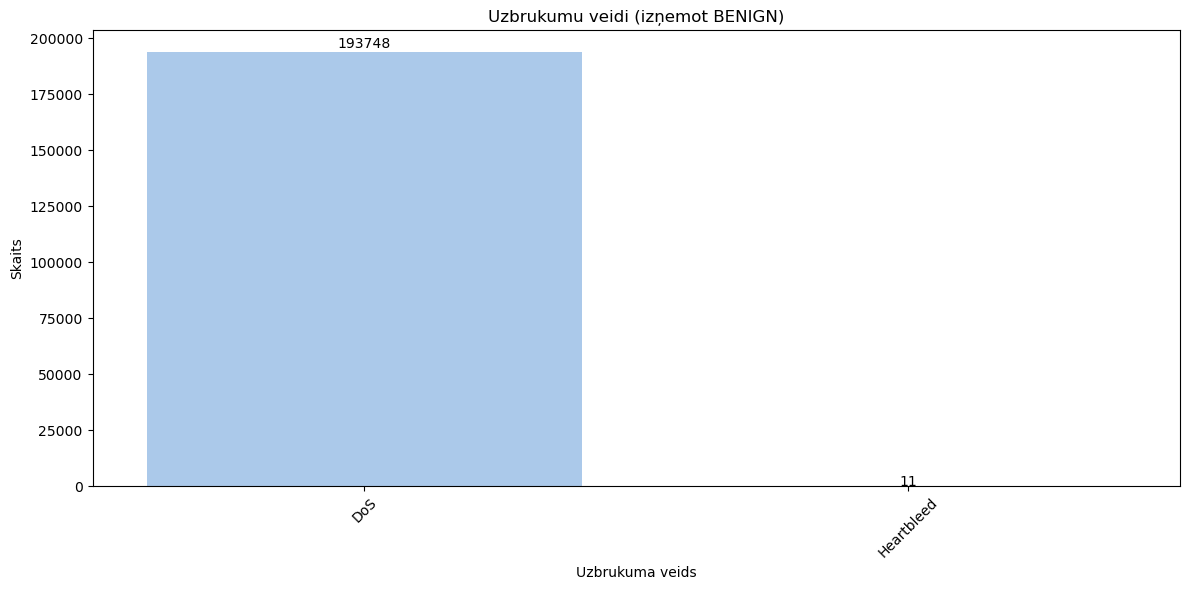

In [68]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Ja "Attack Type" kolonna nav, izmanto "Label" tās vietā
data_combined['Attack Type'] = data_combined['Label'].map(attack_map)

import matplotlib.pyplot as plt
import seaborn as sns

# Izfiltrē visus izņemot "BENIGN"
attacks = data_combined.loc[data_combined['Attack Type'] != 'BENIGN']

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='Attack Type',
    hue='Attack Type',
    data=attacks,
    palette='pastel',
    order=attacks['Attack Type'].value_counts().index,
    legend=False
)
plt.title('Uzbrukumu veidi (izņemot BENIGN)')
plt.xlabel('Uzbrukuma veids')
plt.ylabel('Skaits')
plt.xticks(rotation=45)

# Skaitliskie anotācijas virs stabiņiem
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height() * 1.01), 
        ha='center'
    )

plt.tight_layout()
plt.show()


In [69]:
# Atdala iezīmes (X) un mērķa mainīgo (y)
X = data_combined.drop(['Label', 'Attack Type'], axis=1)
y = data_combined['Label']

# Konvertē mērķa mainīgo (Label) uz skaitlisko vērtību ar LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Sadala datus treniņu un testēšanas kopās
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

# Standartizē datu iezīmes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
from sklearn.tree import DecisionTreeClassifier
# Apmāca Decision Tree modeli
dt = DecisionTreeClassifier(max_depth=6)
t0 = time()
dt.fit(X_train, y_train)
tt0 = time() - t0
print ("Classifier trained in {} seconds.".format(round(tt0, 3)))

t1 = time()
# Paredz rezultātus uz testu datiem
y_pred_dt = dt.predict(X_test)
tt1 = time() - t1
print ("Predicted in {} seconds".format(round(tt1,3)))
# Novērtē precizitāti
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Izvada rezultātu
print('📊 Decision Tree Model')
print(f'Accuracy on test set: {accuracy_dt:.10f}')

Classifier trained in 9.217 seconds.
Predicted in 0.059 seconds
📊 Decision Tree Model
Accuracy on test set: 0.9854288661


In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializē KNN modeli (piemēram, ar k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Apmāca modeli
t2 = time()
knn.fit(X_train, y_train)
tt2 = time() - t2
print("Classifier trained in {} seconds.".format(round(tt2, 3)))

# Paredz rezultātus uz testu datiem
t3 = time()
y_pred_knn = knn.predict(X_test)
tt3 = time() - t3
print("Predicted in {} seconds".format(round(tt3, 3)))

# Novērtē precizitāti
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Izvada rezultātu
print('📊 K-Nearest Neighbors (KNN) Model')
print(f'Accuracy on test set: {accuracy_knn:.10f}')

Classifier trained in 0.139 seconds.
Predicted in 113.356 seconds
📊 K-Nearest Neighbors (KNN) Model
Accuracy on test set: 0.9986629484


In [72]:
from sklearn.neighbors import KNeighborsClassifier
# Izvada datu dimensijas
rows_knn, cols_knn = data9.shape
print('New dimension:')
print(f'Number of rows: {rows_knn}, Number of columns: {cols_knn}')
print(f'Total cells: {rows_knn * cols_knn}')

# Noņem liekās atstarpes no kolonnu nosaukumiem
col_names_knn = {col_knn: col_knn.strip() for col_knn in data9.columns}
data9.rename(columns=col_names_knn, inplace=True)

# Datu info
data9.info()

New dimension:
Number of rows: 26800, Number of columns: 78
Total cells: 2090400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26800 entries, 0 to 26799
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                26800 non-null  float64
 1   Total Fwd Packets            26800 non-null  float64
 2   Total Backward Packets       26800 non-null  float64
 3   Total Length of Fwd Packets  26800 non-null  float64
 4   Total Length of Bwd Packets  26800 non-null  float64
 5   Fwd Packet Length Max        26800 non-null  float64
 6   Fwd Packet Length Min        26800 non-null  float64
 7   Fwd Packet Length Mean       26800 non-null  float64
 8   Fwd Packet Length Std        26800 non-null  float64
 9   Bwd Packet Length Max        26800 non-null  float64
 10  Bwd Packet Length Min        26800 non-null  float64
 11  Bwd Packet Length Mean       26800 non-null  float6

In [73]:
# Daru tīrīšana
# Dublētu vērtību identificēšana
dups_knn = data9[data9.duplicated()]
print(f'Number of duplicates: {len(dups_knn)}')

Number of duplicates: 2675


In [74]:
# Noņemam visus dubultos ierakstus
data9.drop_duplicates(inplace = True)
data9.shape

(24125, 78)

In [75]:
# Trūkstošo vērtību pārbaude
missing_val_knn = data9.isna().sum()
missing_total = missing_val_knn.sum()
print(f"Trūkstošo vērtību skaits – {missing_total}")

Trūkstošo vērtību skaits – 0


In [76]:
# Bezgalības vērtību apstrāde
numeric_cols_knn = data9.select_dtypes(include=np.number).columns
inf_count_knn = np.isinf(data9[numeric_cols_knn]).sum();
print(f'Initial missing values: {data9.isna().sum().sum()}')

Initial missing values: 0


KNN Classifier trained in 0.01 seconds.
KNN Predicted in 0.37 seconds.
📊 KNN Model (on data9)
Accuracy on test set: 0.9725


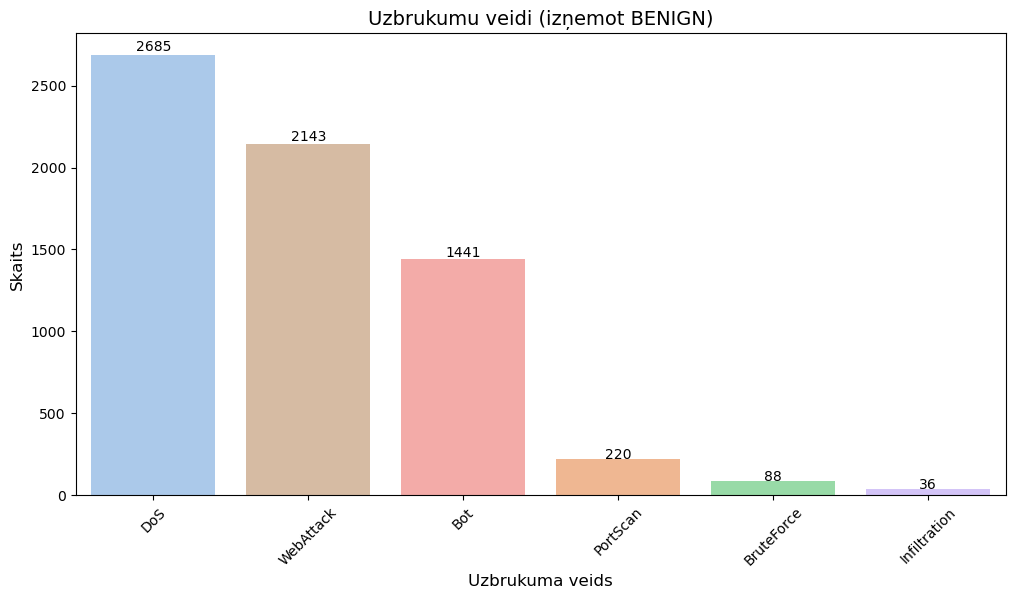

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapējam Label vērtības uz attiecīgajiem uzbrukumu veidiem
attack_map_knn = {
    0: 'BENIGN',
    3: 'DoS',
    6: 'WebAttack',
    1: 'Bot',
    5: 'PortScan',
    2: 'BruteForce',
    4: 'Infiltration'
}

# Pievienojam jaunu kolonnu 'Attack Type', kur saglabājam uzbrukumu veidus
data9['Attack Type'] = data9['Label'].map(attack_map_knn)

# Izfiltrējam tikai tos ierakstus, kas nav 'BENIGN'
attacks = data9.loc[data9['Attack Type'] != 'BENIGN']

# Zīmējam grafiku
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='Attack Type',
    hue='Attack Type',
    data=attacks,
    palette='pastel',
    order=attacks['Attack Type'].value_counts().index,
    legend=False
)

# Pievienojam grafika virsrakstu un asi nosaukumus
plt.title('Uzbrukumu veidi (izņemot BENIGN)', fontsize=14)
plt.xlabel('Uzbrukuma veids', fontsize=12)
plt.ylabel('Skaits', fontsize=12)
plt.xticks(rotation=45)

# Pievienojam skaitliskās anotācijas virs katra staba
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height() * 1.01), 
        ha='center'
    )

# Modelēšana
X_knn = data9.drop(['Label', 'Attack Type'], axis=1, errors='ignore')
y_knn = data9['Label']

le_knn = LabelEncoder()
y_knn_encoded = le_knn.fit_transform(y_knn)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn_encoded, test_size=0.3, random_state=0)

scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_test_knn = scaler_knn.transform(X_test_knn)

# Trenē KNN
knn = KNeighborsClassifier(n_neighbors=5)
t4 = time()
knn.fit(X_train_knn, y_train_knn)
tt4 = time() - t4
print("KNN Classifier trained in {} seconds.".format(round(tt4, 3)))

t5 = time()
y_pred_knn = knn.predict(X_test_knn)
tt5 = time() - t5
print("KNN Predicted in {} seconds.".format(round(tt5, 3)))

accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f'📊 KNN Model (on data9)')
print(f'Accuracy on test set: {accuracy_knn:.4f}')

In [78]:
from sklearn.naive_bayes import GaussianNB
# Apmāca Gaussian Naive Bayes modeli
gnb = GaussianNB()
t5 = time()
gnb.fit(X_train, y_train)
tt5 = time() - t5
print("Classifier trained in {} seconds.".format(round(tt5, 3)))

# Paredz rezultātus uz testu datiem
t6 = time()
y_pred_gnb = gnb.predict(X_test)
tt6 = time() - t6
print("Predicted in {} seconds.".format(round(tt6, 3)))

# Novērtē precizitāti
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print('📊 Gaussian Naive Bayes Model')
print(f'Accuracy on test set: {accuracy_gnb:.10f}')

Classifier trained in 0.6 seconds.
Predicted in 0.773 seconds.
📊 Gaussian Naive Bayes Model
Accuracy on test set: 0.9186144871
